# About this notebook

This notebook aims to visualise the fundamental space-accuracy tradeoff of a [Bloom filter](https://en.wikipedia.org/wiki/Bloom_filter).

Bloom filters can sometimes give false positives. With a bit size of 8, the false positive rate is about 2%. This can be unacceptably high for some applications, so choosing the right bit size is important.

## Methodology

I plot the error rate of a Bloom filter `e` with respect to the number of bits `b` used per object.

I also plot the expected number of false positives `f` given a certain dataset size and number of bits `b`.

Since false positives are assumed to be independent of each other, the expectation of false positives is error rate `e * size`.

In [67]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

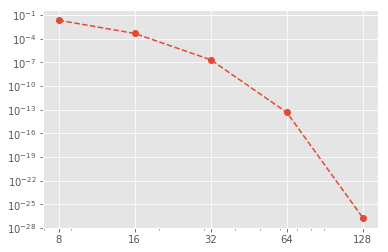

Error rate for 8 bits: 2.1415847120684%
Error rate for 16 bits: 0.0458638507896%
Error rate for 32 bits: 0.0000210349281%
Error rate for 64 bits: 0.0000000000044%
Error rate for 128 bits: 0.0000000000000%


In [68]:
# Plot the error rate e given number of bits b

#b = [2**i for i in range(3, 9)] #range from 8 bits to 128 bits (16 bytes)
b = np.geomspace(8, 128, num=5)
e = ((1/2) ** (math.log(2) * b))

fig1, ax1 = plt.subplots()
plt.xscale('log')
plt.yscale('log')
ax1.set_xticks(np.around(b).astype(int))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.plot(b,e, marker='o', linestyle='--')
plt.show()

for index, error_rate in enumerate(e):
    print("Error rate for {} bits: {:.13%}".format((np.around(b[index]).astype(int)), error_rate))

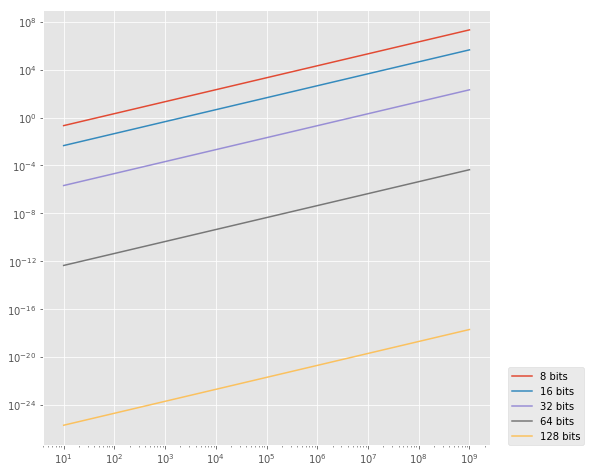

In [69]:
# Now we plot size and find the expected number of false positives
# given a certain number of bits
size = np.geomspace(10, 1000000000)
plt.figure(figsize=(8,8))
for index, bit_size in enumerate(b):
    fp = (np.multiply(e[index], size))
    plt.plot(size, fp, label="{} bits".format(np.around(bit_size).
                                              astype(int)))
   
plt.legend(loc=(1.04, 0))
plt.xscale('log')
plt.yscale('log')
plt.show()

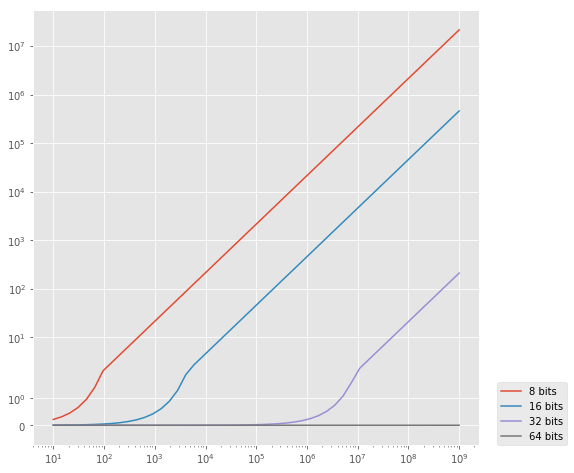

In [70]:
size = np.geomspace(10, 1000000000)
plt.figure(figsize=(8,8))
for index, bit_size in enumerate(b[:4]):
    fp = (np.multiply(e[index], size))
    plt.plot(size, fp, label="{} bits".format(np.around(bit_size).
                                              astype(int)))
   
plt.legend(loc=(1.04, 0))
plt.xscale('log')
plt.yscale('symlog')
plt.show()

# Conclusion

I hope this visualisation has been somewhat useful in helping the designer choose the correct bitsize for his application.

To me it seems like "32 bits ought to be enough for anyone": even with a billion entries, the expected number of false positives is still extremely, comically low (around 200). You could even get away with 16 bits (2 bytes per entry).

Compare to a 32-bit hash table which would have a load factor of ~50% with a billion entries and would require double the memory.